### Importação dos dados



In [2]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

## Importação dos dados
#Os dados das quatro lojas foram importados diretamente do repositório oficial do desafio,utilizando arquivos CSV e a biblioteca Pandas.

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [6]:
faturamento_lojas = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Faturamento Total': [
        loja['Preço'].sum(),
        loja2['Preço'].sum(),
        loja3['Preço'].sum(),
        loja4['Preço'].sum()
    ]
})

faturamento_lojas

,Loja,Faturamento Total
0,Loja 1,1534509.12
1,Loja 2,1488459.06
2,Loja 3,1464025.03
3,Loja 4,1384497.58


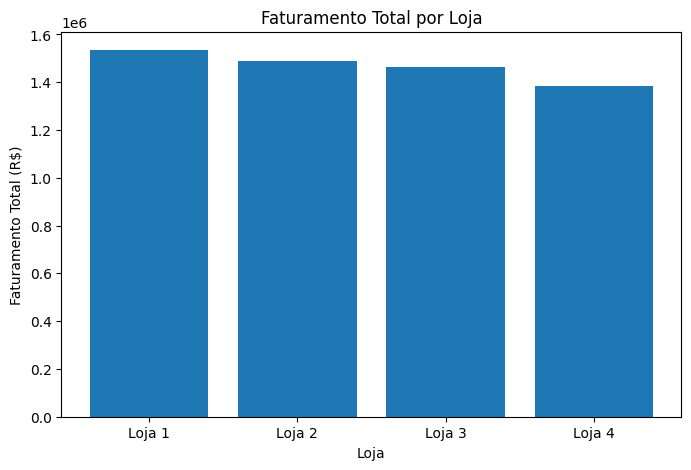

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(
    faturamento_lojas['Loja'],
    faturamento_lojas['Faturamento Total']
)
plt.title('Faturamento Total por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento Total (R$)')
plt.show()

In [8]:
## Análise do Faturamento

# O faturamento total de cada loja foi calculado a partir da soma dos valores da coluna **Preço**.
# O gráfico de colunas permite comparar visualmente o desempenho financeiro das quatro lojas,
# evidenciando aquelas com maior e menor faturamento.
# 👉 A Loja 4 apresentou o pior faturamento, pois possui o menor faturamento total entre as quatro lojas analisadas.


# 2. Vendas por Categoria

In [10]:
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

todas_lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)
todas_lojas.head()


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


In [14]:
vendas_por_categoria = (
    todas_lojas
    .groupby(['Loja', 'Categoria do Produto'])
    .size()
    .reset_index(name='Quantidade de Vendas')
)

vendas_por_categoria

,Loja,Categoria do Produto,Quantidade de Vendas
0,Loja 1,brinquedos,324
1,Loja 1,eletrodomesticos,312
2,Loja 1,eletronicos,448
3,Loja 1,esporte e lazer,284
4,Loja 1,instrumentos musicais,182
5,Loja 1,livros,173
6,Loja 1,moveis,465
7,Loja 1,utilidades domesticas,171
8,Loja 2,brinquedos,313
9,Loja 2,eletrodomesticos,305


In [15]:
categorias_populares = (
    vendas_por_categoria
    .sort_values(['Loja', 'Quantidade de Vendas'], ascending=[True, False])
    .groupby('Loja')
    .head(3)
)

categorias_populares

,Loja,Categoria do Produto,Quantidade de Vendas
6,Loja 1,moveis,465
2,Loja 1,eletronicos,448
0,Loja 1,brinquedos,324
14,Loja 2,moveis,442
10,Loja 2,eletronicos,422
8,Loja 2,brinquedos,313
22,Loja 3,moveis,499
18,Loja 3,eletronicos,451
16,Loja 3,brinquedos,315
30,Loja 4,moveis,480


In [27]:
vendas_totais_por_loja = (
    vendas_por_categoria
    .groupby('Loja')['Quantidade de Vendas']
    .sum()
    .reset_index()
)

vendas_totais_por_loja

,Loja,Quantidade de Vendas
0,Loja 1,2359
1,Loja 2,2359
2,Loja 3,2359
3,Loja 4,2358


In [ ]:
## Vendas por Categoria

# A quantidade de produtos vendidos foi calculada a partir do agrupamento dos dados
# por loja e categoria do produto. Dessa forma, foi possível identificar as categorias
# mais populares em cada loja, com base no número de vendas realizadas.

In [16]:
distribuicao_categorias = (
    todas_lojas['Categoria do Produto']
    .value_counts()
)

distribuicao_categorias

,count
Categoria do Produto,
moveis,1886
eletronicos,1772
brinquedos,1290
eletrodomesticos,1149
esporte e lazer,1113
instrumentos musicais,753
livros,742
utilidades domesticas,730


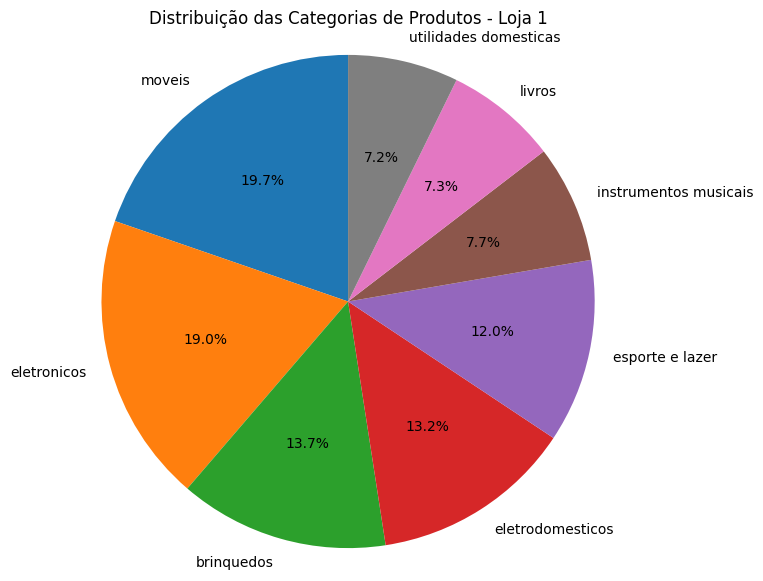

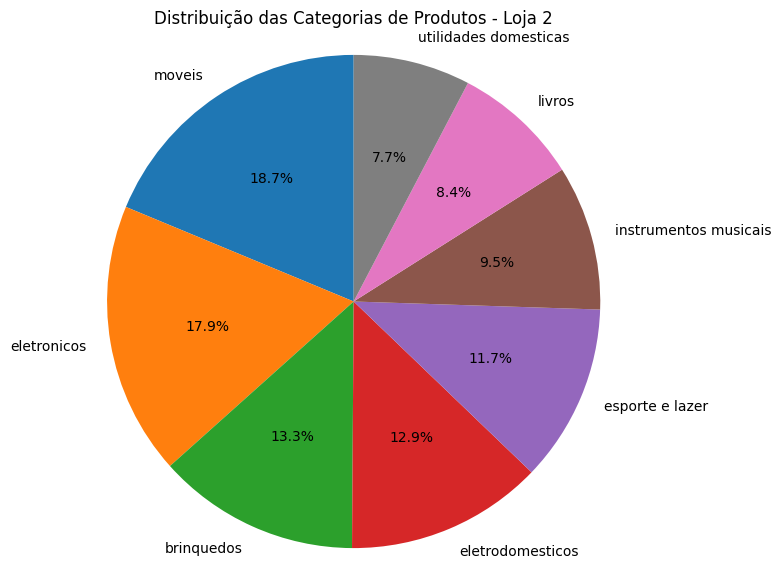

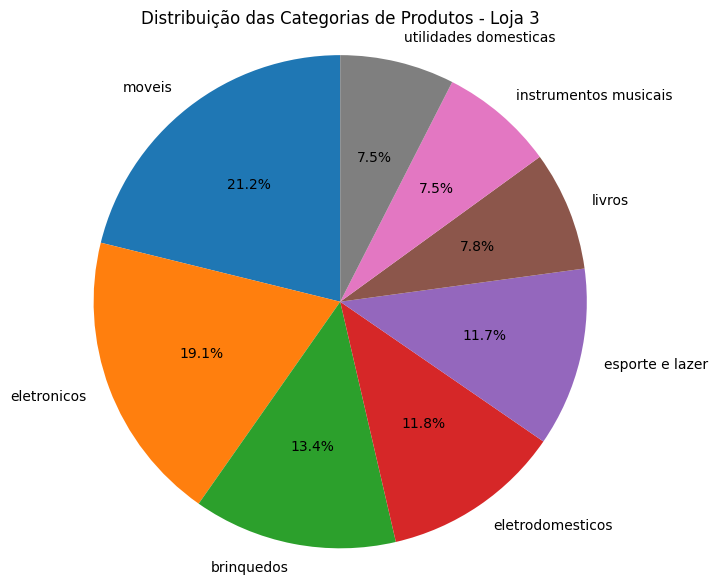

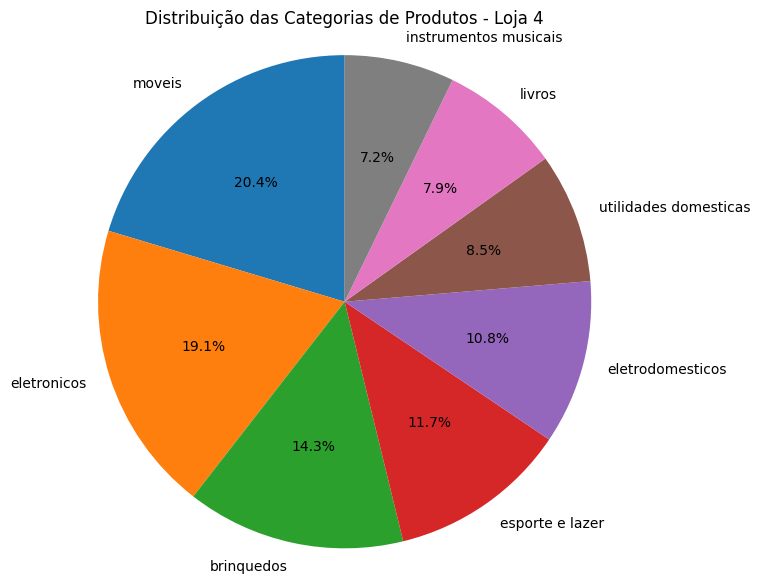

In [18]:
import matplotlib.pyplot as plt

for loja_nome in todas_lojas['Loja'].unique():
    categorias_loja = (
        todas_lojas[todas_lojas['Loja'] == loja_nome]
        ['Categoria do Produto']
        .value_counts()
    )

    plt.figure(figsize=(7,7))
    plt.pie(
        categorias_loja.values,
        labels=categorias_loja.index,
        autopct='%1.1f%%',
        startangle=90
    )
    plt.title(f'Distribuição das Categorias de Produtos - {loja_nome}')
    plt.axis('equal')
    plt.show()

# 3. Média de Avaliação das Lojas


In [20]:
media_avaliacao = (
    todas_lojas
    .groupby('Loja')['Avaliação da compra']
    .mean()
    .reset_index()
)

media_avaliacao

,Loja,Avaliação da compra
0,Loja 1,3.976685
1,Loja 2,4.037304
2,Loja 3,4.048326
3,Loja 4,3.995759


In [21]:
media_avaliacao['Avaliação da compra'] = media_avaliacao['Avaliação da compra'].round(2)
media_avaliacao

,Loja,Avaliação da compra
0,Loja 1,3.98
1,Loja 2,4.04
2,Loja 3,4.05
3,Loja 4,4.00


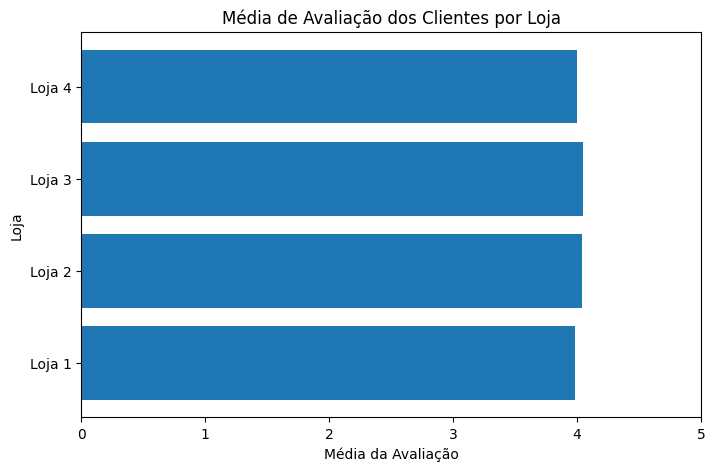

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(
    media_avaliacao['Loja'],
    media_avaliacao['Avaliação da compra']
)
plt.title('Média de Avaliação dos Clientes por Loja')
plt.xlabel('Média da Avaliação')
plt.ylabel('Loja')
plt.xlim(0,5)
plt.show()


In [28]:
# Além disso, ao analisar a média das avaliações dos clientes, observou-se que a Loja 1 apresentou a pior média de avaliação, indicando um nível de satisfação inferior em relação às demais lojas.

# 4. Produtos Mais e Menos Vendidos

In [29]:
# Cálculo da quantidade vendida por produto (por loja)
produtos_por_loja = (
    todas_lojas
    .groupby(['Loja', 'Produto'])
    .size()
    .reset_index(name='Quantidade de Vendas')
)

produtos_por_loja

,Loja,Produto,Quantidade de Vendas
0,Loja 1,Assistente virtual,40
1,Loja 1,Bateria,53
2,Loja 1,Bicicleta,54
3,Loja 1,Blocos de montar,56
4,Loja 1,Bola de basquete,55
...,...,...,...
199,Loja 4,Sofá retrátil,47
200,Loja 4,TV Led UHD 4K,40
201,Loja 4,Tablet ABXY,45
202,Loja 4,Violão,37


In [30]:
# Produtos mais vendidos (Top 5 por loja)
mais_vendidos = (
    produtos_por_loja
    .sort_values(['Loja', 'Quantidade de Vendas'], ascending=[True, False])
    .groupby('Loja')
    .head(5)
)

mais_vendidos

,Loja,Produto,Quantidade de Vendas
24,Loja 1,Guarda roupas,60
37,Loja 1,Micro-ondas,60
47,Loja 1,TV Led UHD 4K,60
43,Loja 1,Secadora de roupas,58
3,Loja 1,Blocos de montar,56
79,Loja 2,Iniciando em programação,65
88,Loja 2,Micro-ondas,62
52,Loja 2,Bateria,61
91,Loja 2,Pandeiro,58
100,Loja 2,Violão,58


In [31]:
# Produtos menos vendidos (Top 5 por loja)
menos_vendidos = (
    produtos_por_loja
    .sort_values(['Loja', 'Quantidade de Vendas'], ascending=[True, True])
    .groupby('Loja')
    .head(5)
)

menos_vendidos

,Loja,Produto,Quantidade de Vendas
11,Loja 1,Celular ABXY,33
26,Loja 1,Headset,33
41,Loja 1,Panela de pressão,35
40,Loja 1,Pandeiro,36
13,Loja 1,Ciência de dados com python,39
82,Loja 2,Jogo de tabuleiro,32
78,Loja 2,Impressora,34
87,Loja 2,Mesa de jantar,34
93,Loja 2,Poltrona,35
73,Loja 2,Fone de ouvido,37


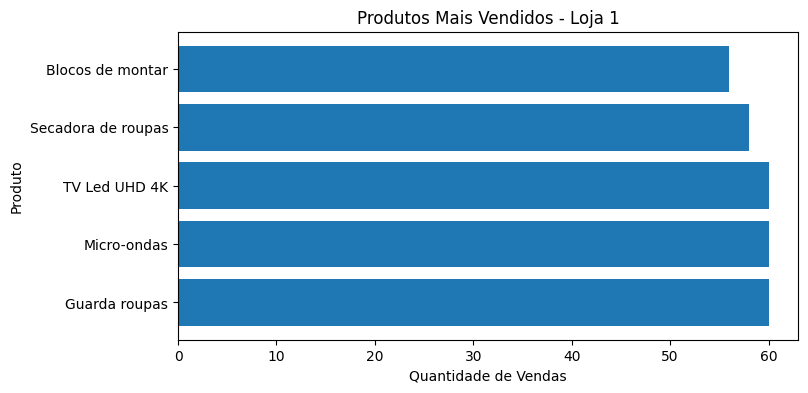

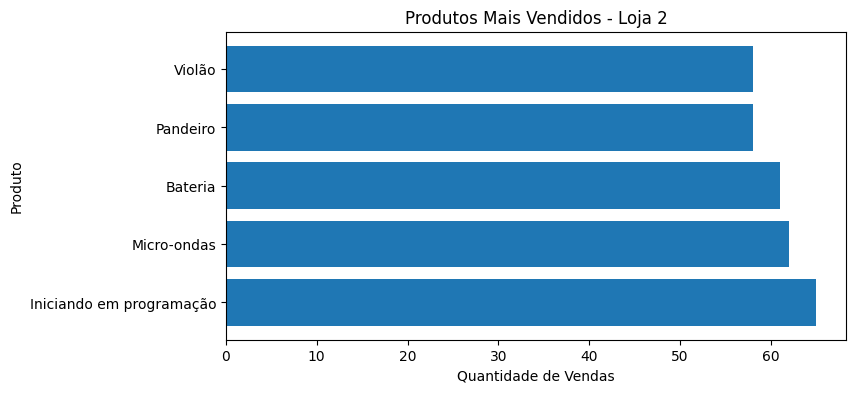

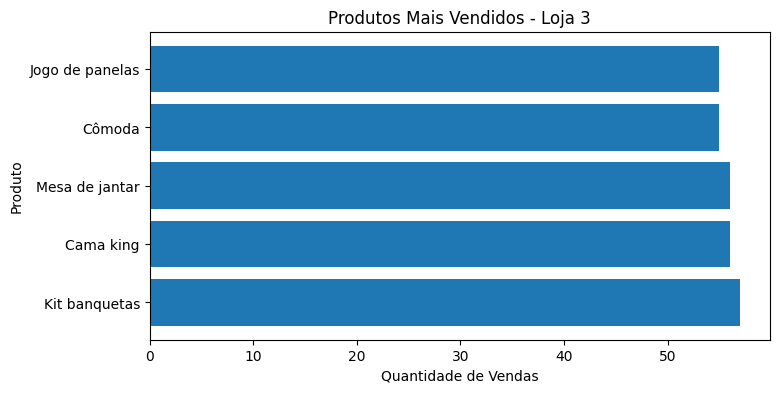

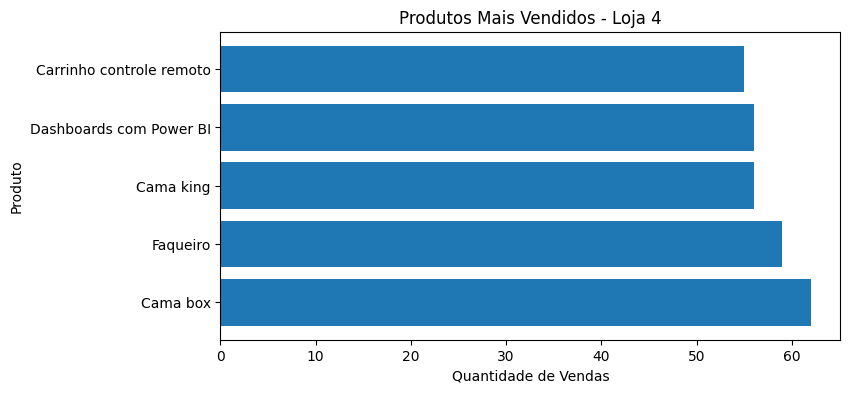

In [32]:
#Visualização — produtos mais vendidos por loja
import matplotlib.pyplot as plt

for loja_nome in mais_vendidos['Loja'].unique():
    dados_loja = mais_vendidos[mais_vendidos['Loja'] == loja_nome]

    plt.figure(figsize=(8,4))
    plt.barh(
        dados_loja['Produto'],
        dados_loja['Quantidade de Vendas']
    )
    plt.title(f'Produtos Mais Vendidos - {loja_nome}')
    plt.xlabel('Quantidade de Vendas')
    plt.ylabel('Produto')
    plt.show()

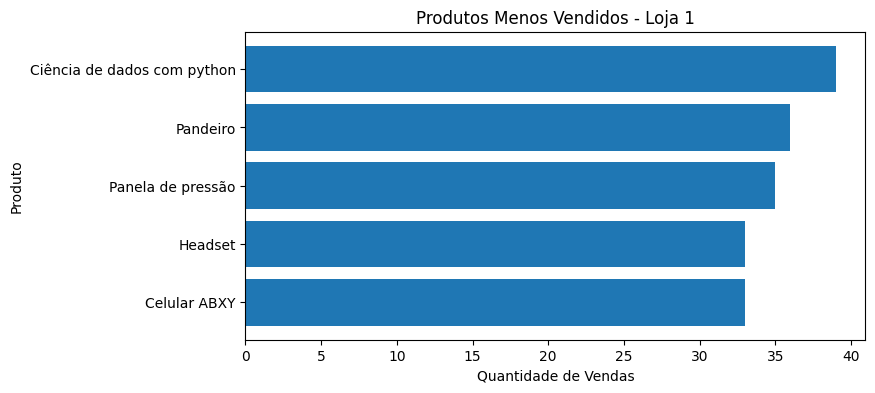

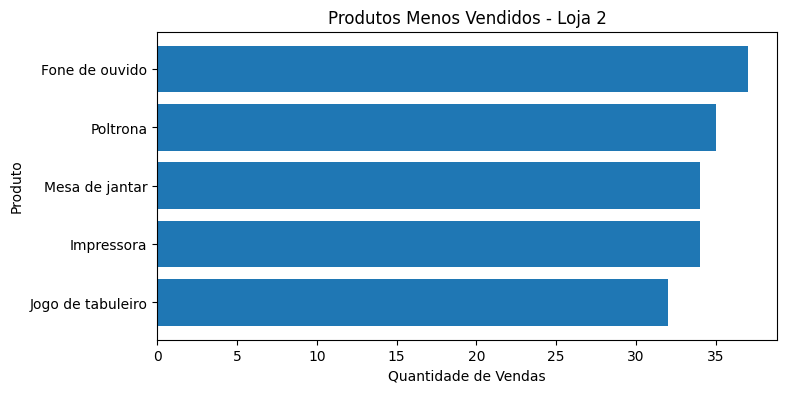

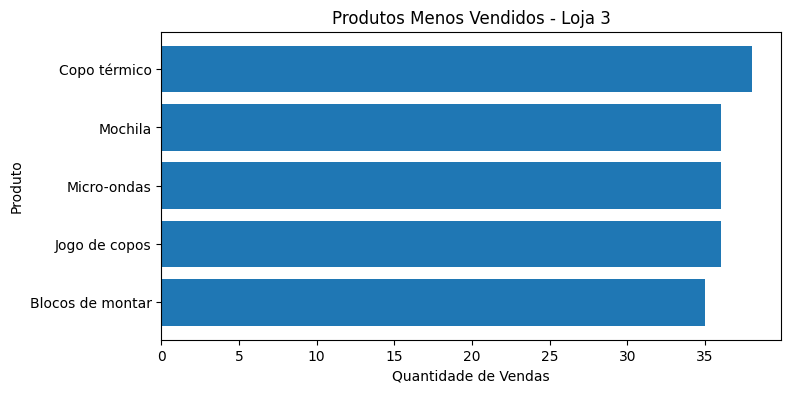

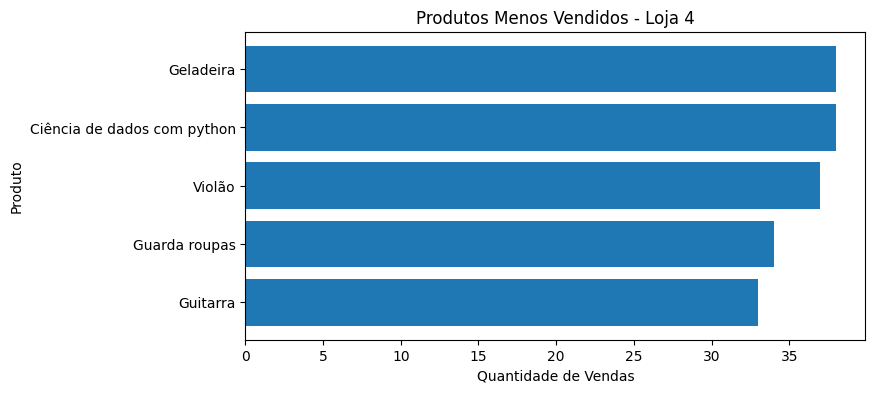

In [33]:
# Visualização — produtos menos vendidos por loja

for loja_nome in menos_vendidos['Loja'].unique():
    dados_loja = menos_vendidos[menos_vendidos['Loja'] == loja_nome]

    plt.figure(figsize=(8,4))
    plt.barh(
        dados_loja['Produto'],
        dados_loja['Quantidade de Vendas']
    )
    plt.title(f'Produtos Menos Vendidos - {loja_nome}')
    plt.xlabel('Quantidade de Vendas')
    plt.ylabel('Produto')
    plt.show()

In [34]:
# A análise dos produtos mais e menos vendidos foi realizada a partir da contagem do número de vendas por produto em cada loja.
# Os gráficos permitem identificar com clareza quais produtos se destacaram positivamente nas vendas.
# Também foi possível identificar quais produtos apresentaram menor desempenho em cada unidade.


# 5. Frete Médio por Loja

In [35]:
frete_medio = (
    todas_lojas
    .groupby('Loja')['Frete']
    .mean()
    .reset_index()
)

frete_medio

,Loja,Frete
0,Loja 1,34.691805
1,Loja 2,33.621941
2,Loja 3,33.074464
3,Loja 4,31.278997


In [36]:
frete_medio['Frete'] = frete_medio['Frete'].round(2)
frete_medio

,Loja,Frete
0,Loja 1,34.69
1,Loja 2,33.62
2,Loja 3,33.07
3,Loja 4,31.28


<Figure size 800x500 with 0 Axes>

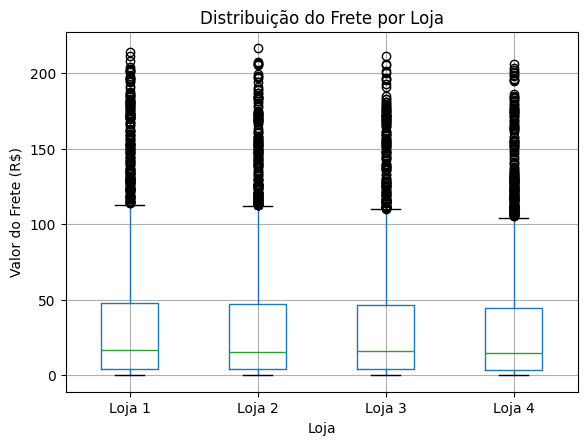

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

todas_lojas.boxplot(
    column='Frete',
    by='Loja'
)

plt.title('Distribuição do Frete por Loja')
plt.suptitle('')  # remove título automático do pandas
plt.xlabel('Loja')
plt.ylabel('Valor do Frete (R$)')
plt.show()

In [39]:
# O boxplot apresenta a distribuição dos valores de frete por loja.
# Esse tipo de gráfico permite analisar a variação dos custos, identificar possíveis outliers e comparar a dispersão do frete entre as lojas.
# A visualização complementa a análise do custo médio do frete, trazendo uma visão mais detalhada do comportamento dos dados.

# Relatório Final – Análise de Desempenho das Lojas Alura Store

## Introdução

O objetivo desta análise foi auxiliar o Senhor João na decisão de qual loja de sua rede Alura Store deve ser vendida para viabilizar o início de um novo empreendimento. Para isso, foram analisados dados de vendas das quatro lojas, considerando diferentes métricas de desempenho financeiro, comportamento de vendas, satisfação dos clientes e custos logísticos. As análises foram apoiadas por tabelas e visualizações gráficas, permitindo uma avaliação comparativa clara entre as lojas.

## Análise dos Dados

### Faturamento Total
A análise do faturamento total, obtida a partir da soma dos valores da coluna **Preço**, mostrou diferenças relevantes entre as lojas. A Loja 4 apresentou o menor faturamento entre as quatro unidades, indicando um desempenho financeiro inferior em relação às demais.

### Vendas por Categoria
Ao agrupar os dados por categoria de produto e por loja, foi possível identificar as categorias mais populares em cada unidade. De modo geral, as lojas apresentaram padrões semelhantes de categorias mais vendidas, sem que a Loja 4 se destacasse positivamente em nenhuma delas. Isso indica que sua menor performance financeira não é compensada por um mix de categorias mais atrativo.

### Média de Avaliação dos Clientes
A média das avaliações dos clientes revelou que a Loja 1 apresentou a pior média de satisfação. Apesar disso, a Loja 4 também não se destaca positivamente nesse indicador, apresentando uma avaliação intermediária, o que não é suficiente para compensar seu fraco desempenho financeiro.

### Produtos Mais e Menos Vendidos
A análise dos produtos mais e menos vendidos por loja mostrou que todas as unidades possuem produtos com bom e mau desempenho. No entanto, a Loja 4 não apresenta produtos que se destaquem de forma relevante entre os mais vendidos, reforçando a percepção de menor eficiência comercial quando comparada às demais lojas.

### Custo Médio do Frete
O custo médio do frete foi analisado considerando que esse valor é pago pelo cliente e pode impactar diretamente sua experiência de compra. Embora existam variações entre as lojas, a Loja 4 não apresenta vantagem competitiva significativa nesse aspecto, não conseguindo compensar seu menor faturamento e desempenho geral.

## Conclusão e Recomendação

Com base nas análises realizadas e nos gráficos gerados, conclui-se que a **Loja 4 apresenta o pior desempenho geral** entre as quatro unidades analisadas. Essa conclusão é sustentada principalmente pelo fato de a Loja 4 possuir o menor faturamento total, não se destacar nas vendas por categoria ou nos produtos mais vendidos, e não apresentar vantagens relevantes em avaliação de clientes ou custo de frete.

Dessa forma, considerando a eficiência geral e a combinação dos indicadores analisados — faturamento, vendas, satisfação dos clientes e frete — recomenda-se que o **Senhor João venda a Loja 4**, pois ela demonstra menor competitividade e menor retorno em relação às demais lojas da rede.
